### Ведение

#### Немного о том, про что ноутбук

Итак, настал этот прекрасный момент, чтобы изучить и применить на практике архитектуру Yolo11 для задачи классификации.

Я решил выделить ее в отдельный ноутбук для удобства. Все необходимые ячейки будут скопированы из прошлого ноутбука 01.Classification_Images(VGG + ResNet).

В этом ноутбуке будет глобально две части:
- Теоретическое знакомство с архитектурой Yolo;
- Практическое применение для решения задачи классификации(Повторить самому архитектуру + Дообучить готовую).

Задача:
- Изучить теоретически архитектуру;
- Ознакомиться с возможностями данной нейросети;
- Реализовать собственное дообучение=)

#### Список источников, откуда черпается информация

- [Документация на сайте Ultralitics](https://docs.ultralytics.com/models/yolo11/)
- [Официальный репозиторий](https://github.com/ultralytics/ultralytics)
- [Статья о развитии архитектуры Yolo](https://datasecrets.ru/articles/20)
- [How to Use Ultralytics YOLO11 for Object Detection and Tracking](https://www.youtube.com/watch?v=-JXwa-WlkU8&ab_channel=Ultralytics)
- [Imagine Classification Yolov11](https://docs.ultralytics.com/tasks/classify/#what-is-the-purpose-of-yolo11-in-image-classification)
- [Официальный гайд по установке Ultralitics](https://docs.ultralytics.com/quickstart/#install-ultralytics)
- [Архитектуры моделей на гитхаб](https://github.com/ultralytics/ultralytics/tree/main/ultralytics/cfg/models/11)
- [Paper: YOLOv8 to YOLO11: A Comprehensive Architecture In-depth Comparative Review](https://arxiv.org/pdf/2501.13400)
- [Код с гитхаба, который необходимо будет разобрать вместе со стаьей выше](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/nn/modules/block.py)


Для задачи классификации
- [Классификация изображений](https://docs.ultralytics.com/ru/tasks/classify/)
- [Обзор наборов данных для классификации изображений](https://docs.ultralytics.com/ru/datasets/classify/)
- []()


Обучающие туториалы
- [Братишки из Индии учат Training for Object Detection](https://www.youtube.com/watch?v=oO7sgQdX-mE&list=PLkz_y24mlSJad5ywmU2gy81LrsX5iNZXG&index=2&ab_channel=DSwithBappy)
- [YOLO11 Architecture - Detailed Explanation](https://www.youtube.com/watch?v=L9Va7Y9UT8E&ab_channel=Dr.PriyantoHidayatullah)
- [Build an AI/ML Tennis Analysis system with YOLO, PyTorch, and Key Point Extraction](https://www.youtube.com/watch?v=L23oIHZE14w&ab_channel=CodeInaJiffy)
- [Обучите YOLOv8 на пользовательском наборе данных(Object Detection)](https://habr.com/ru/articles/714232/)

### Теория

YOLO расшифровывается как You Only Look Once. Это широко известная архитектура компьютерного зрения, которая знаменита в том числе своим огромным количеством версий: первая из них вышла в 2016 году и решала только задачу детекции объектов на изображении, а последняя – одиннадцатая – появилась в сентябре этого года и уже представляет из себя целую фундаментальную модель, которую можно использовать для классификации, трекинга объектов на видео, задач pose estimation и тд. Все это – в реальном времени. 

Да, скорость – это именно то, что выделило YOLO среди других моделей восемь лет назад. До нее в мире CV существовали и другие архитектуры детекции. Например, в 2015 году лучшей считалась Faster R-CNN. Но, несмотря на слово "faster" в названии, эта моделька все еще тормизила на онлайн-тестах из-за своей нагроможденной структуры. Поэтому когда ученые из Вашингтона предложили YOLO, которая рвала конкурентов по времени и при этом показывала хорошие метрики, – это, фактически, перевернуло СV. За следующие 8 лет своего существования YOLO стала своеобразным трансформером во вселенной компьютерного зрения: ее любят и используют повсеместно. 

Архитектура Yolo v1

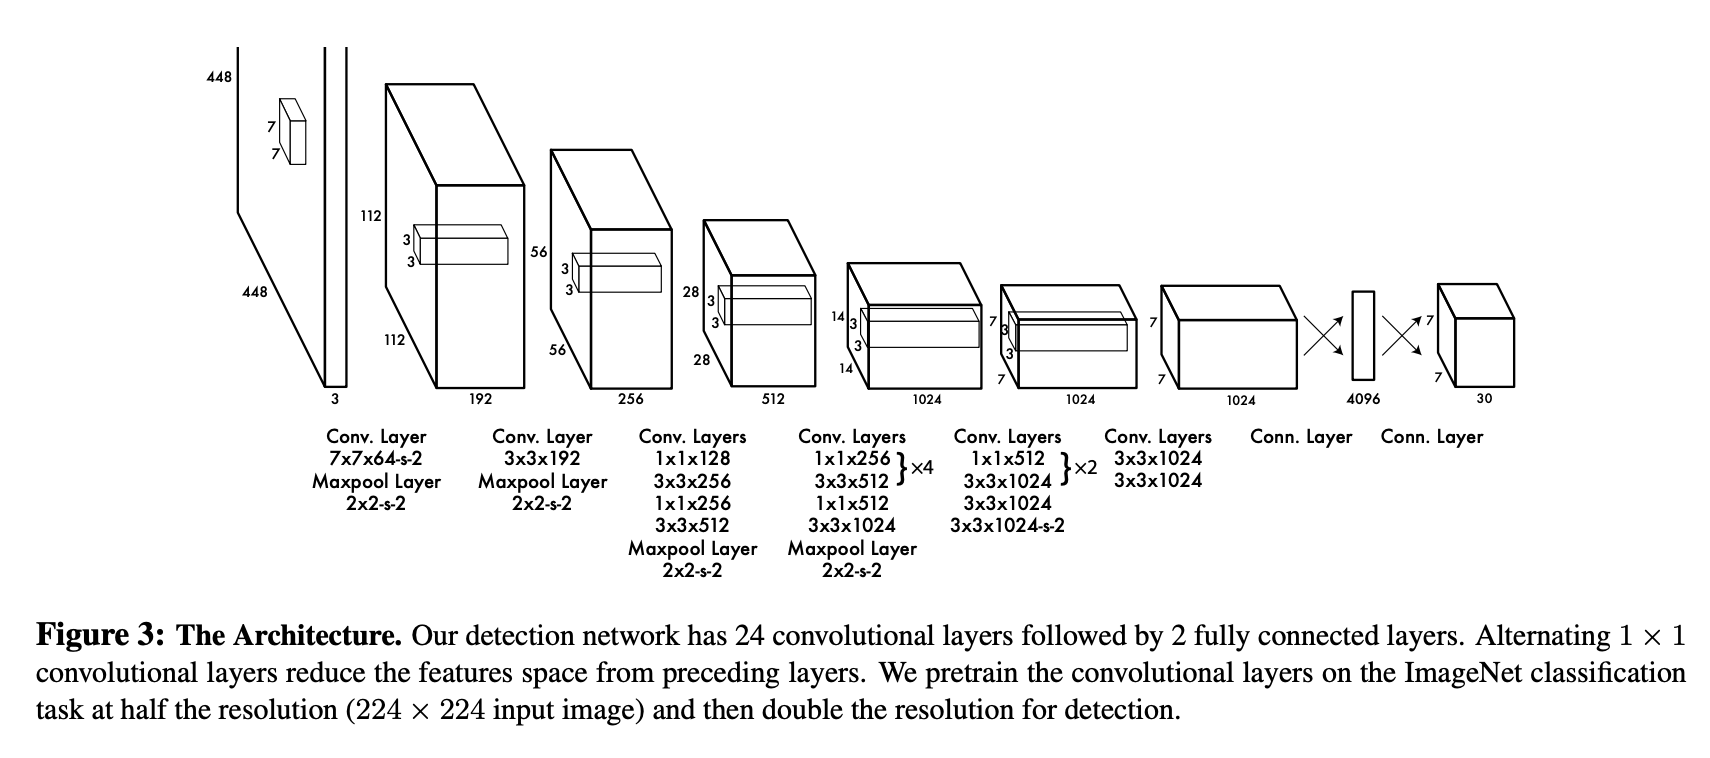
Архитектура Yolo v2

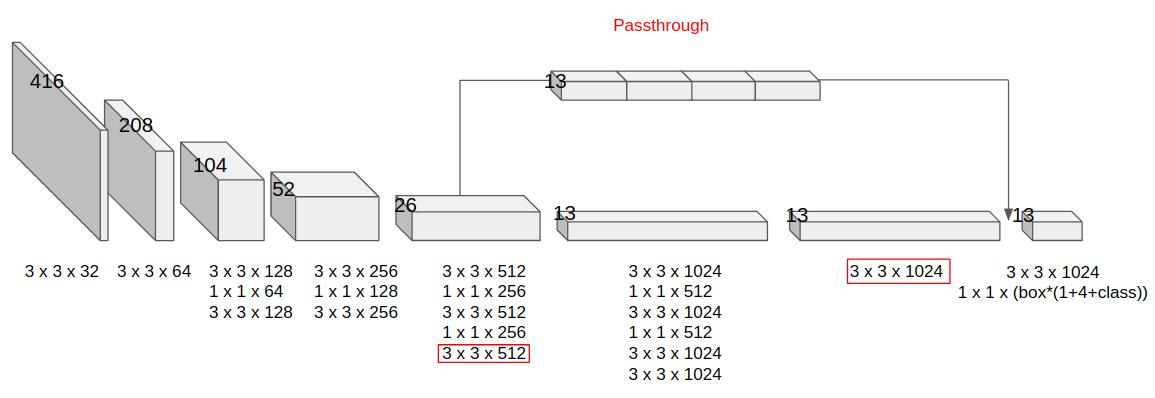
Архитектура Yolo v3

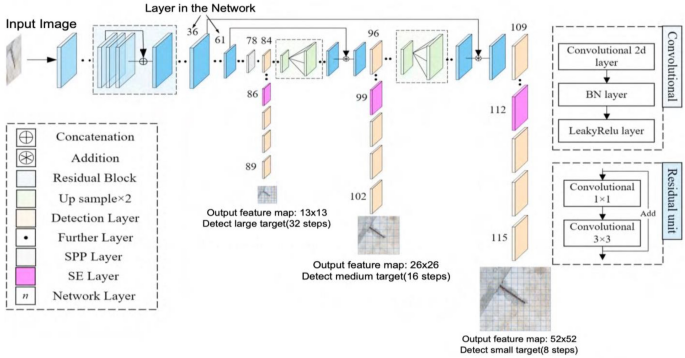

Немного про Yolo v8 - самая широкоиспользуемая модель линейки

В начале 2023 на арену снова вернулись Ultralytics, но на этот раз не с очередной версией пятой YOLO, а с новой YOLOv8. Но прежде, чем говорить о модели, давайте поговорим о том, что сделало восьмую модель такой популярной. Это не архитектура, не сказочные метрики, и даже не молниеносный инференс. Это совершенно новый репозиторий, который построен как единая платформа для обучения моделей детекции, сегментации и классификации. Компания выпустила пять моделей, каждая из которых может работать со всеми перечисленными задачами. Среди них была маленькая и шустрая YOLOv8 Nano и большая и самая точная YOLOv8 Extra Large (YOLOv8x). Все модели поддерживают много форматов экспорта и могут работать и на CPU, и на GPU. А еще YOLOv8 – это самое удобное API, которое совместимо и с командной строкой, и с Python.

Все последующие версии: YOLOv9, YOLOv10 и YOLOv11 тоже выпустила компания Ultralytics, сейчас у них негласная "монополия" на эту архитектуру. Последняя версия вышла совсем недавно: в октябре этого года. Однако сейчас обновление YOLO превратилось уже в скорее инженерную, а не исследовательскую задачу. Раз за разом разработчики оптимизируют инференс, сокращают количество параметров модели, работают над совместимость модели с новым железом и улучшают API. 

По предварительно полученной информации из статьи, сложилось впечатление. как будто лучше начать с изучения v8, т.к. она самая широкоиспользуемая)

Но, пока что надо ознакомиться, с дополнительной информацией про v11

Официальный график замеров моделей Yolo с офф сайта.

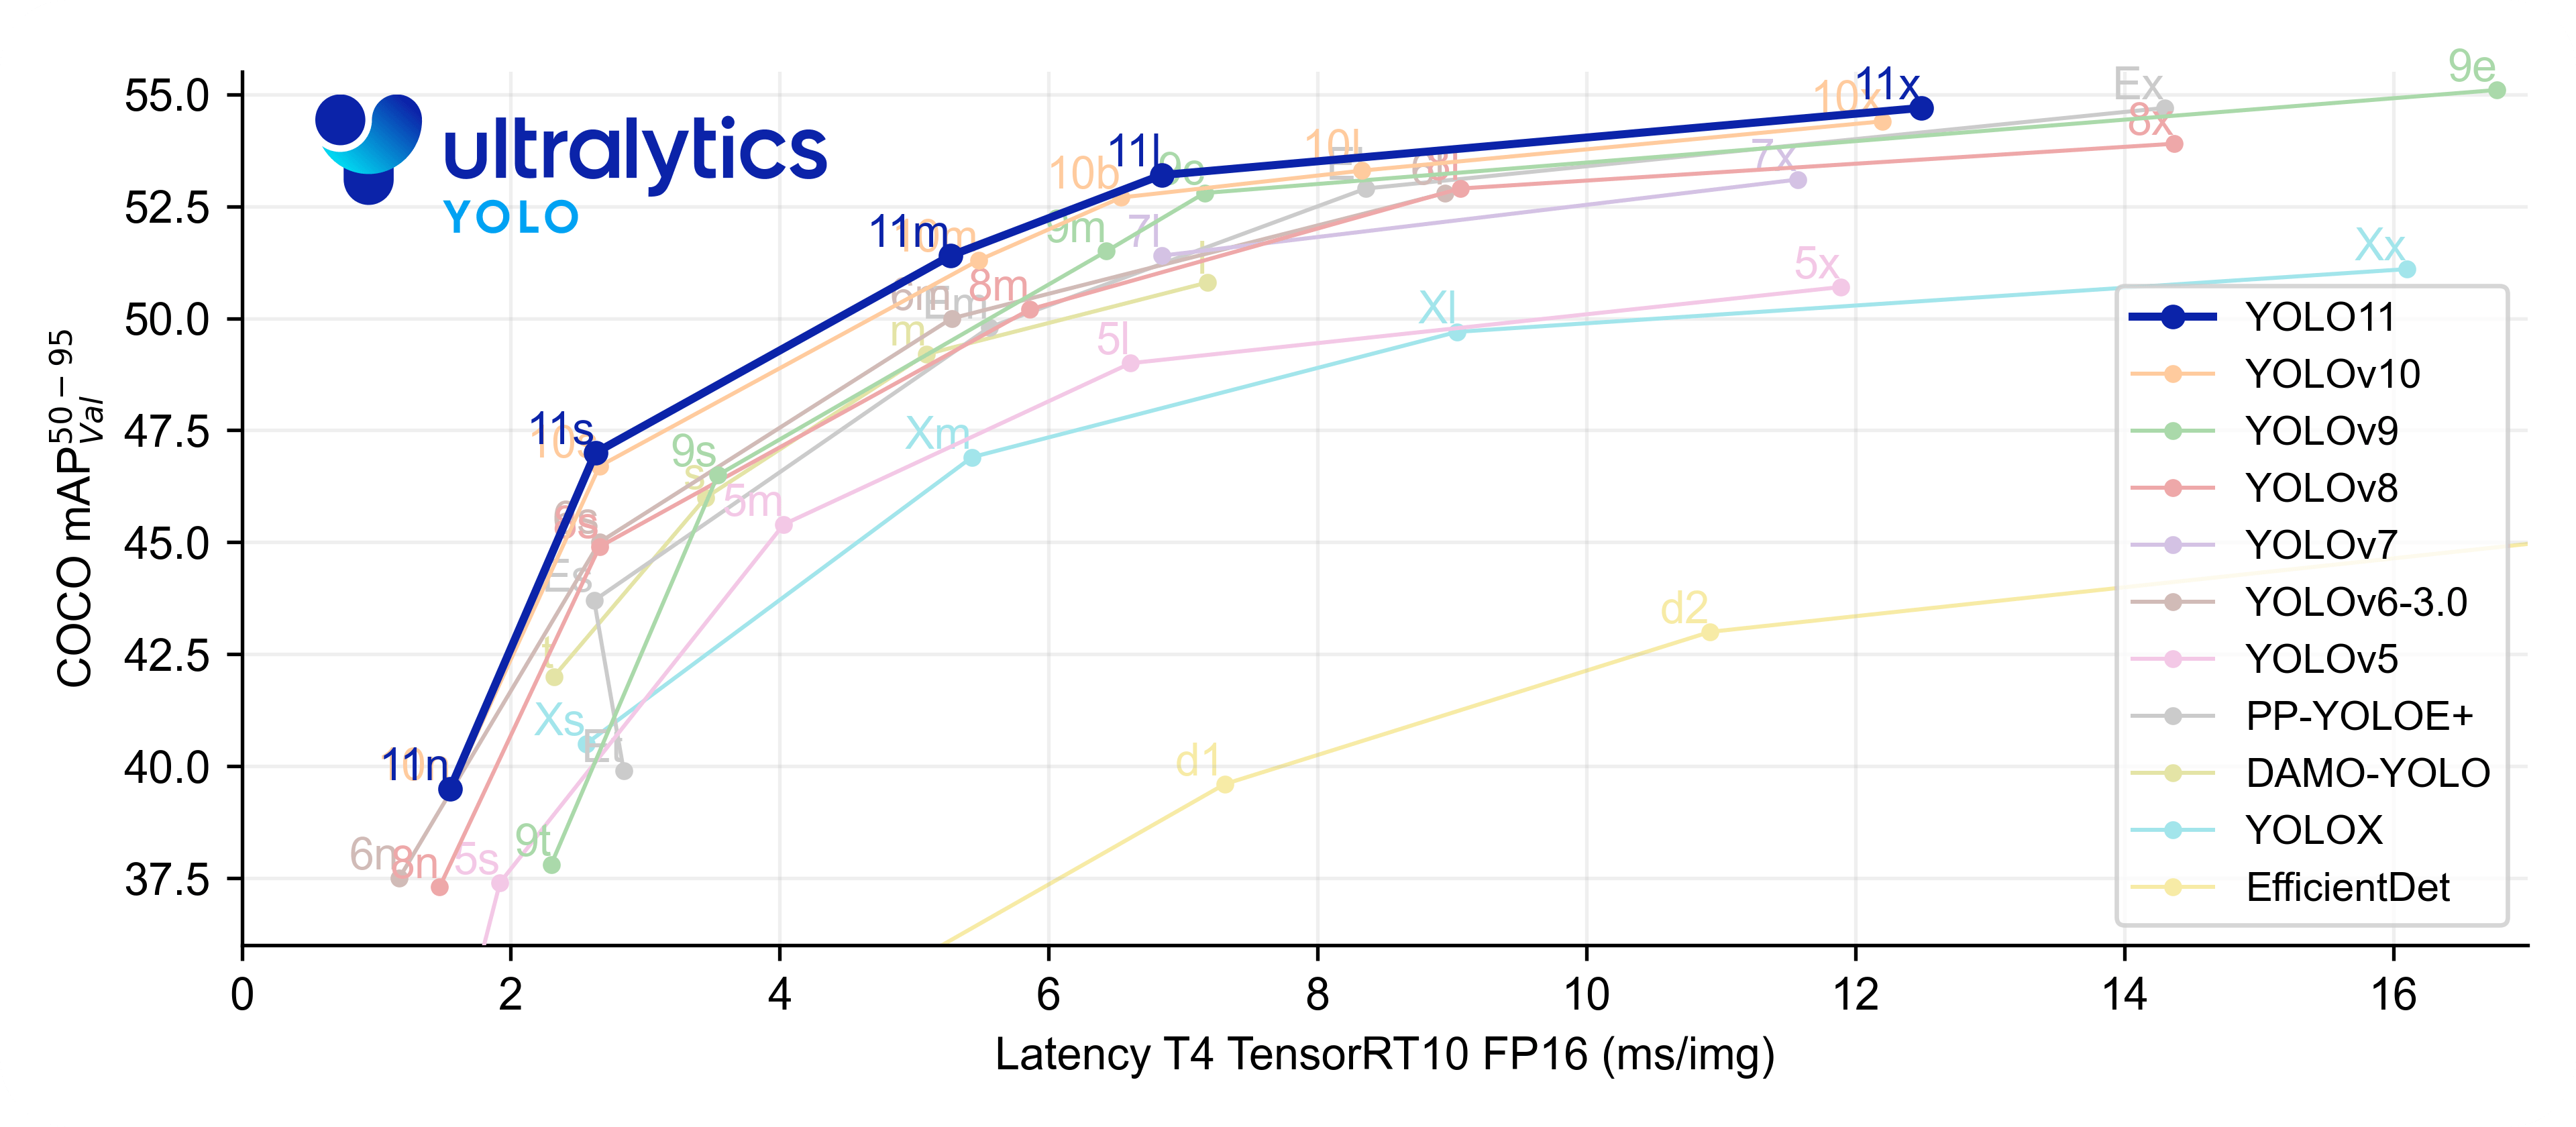

Данный график подтверждает слова из статьи о том, что v9,v10,v11 являются улучшениями v8.

"YOLO11 развивает универсальный модельный ряд, представленный в YOLOv8, предлагая расширенную поддержку различных задач компьютерного зрения" (с) С официального сайта.

С точки зрения эффективности глобального скачка нет, ну чтож) В любом случае, думаю стоит все таки попробовать v11, а в будущем, если понравится, то разобраться и изучить поэтапно все отличительные особенности предыдущих архитектур =)

### Практика

#### Необходимые установки и импорты
- [Официальный гайд по установке Ultralitics](https://docs.ultralytics.com/quickstart/#install-ultralytics)

In [2]:
# Install the ultralytics package from PyPI
# !pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 6.8 MB/s eta 0:00:007.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 32.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 42.7 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.8 MB/s eta 0:00:00


In [1]:
# проверим удастся ли импортировать модели YOLO)
from ultralytics import YOLO

In [8]:
# Создание новой модели YOLO (не предобученной) для классификации
model_Yolo11 = YOLO('yolo11n-cls.yaml')
model_Yolo11

YOLO11n-cls summary: 151 layers, 1,633,584 parameters, 1,633,584 gradients, 3.3 GFLOPs


YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

Я когда, впервые увидел архитектуру Yolo11 :D

YOLO11n-cls summary: 151 layers, 1,633,584 parameters, 1,633,584 gradients, 3.3 GFLOPs

![](https://media.giphy.com/media/iEvGGvvkXde3glumQQ/giphy.gif?cid=790b7611n44jdpd9y50mi6tmu507eu4ya9gngx8fnhefmkw2&ep=v1_gifs_search&rid=giphy.gif&ct=g)

Ну чтож, убедились, что все работает гуд. а значит, необходимо для начала повторить архитектуру Yolo ручками, для лучшего осознания, а затем уже заниматься TransferLearning

In [10]:
# Посмотрим на все слои в более удобочитаемом формате
for layer in model_Yolo11.state_dict():
    print(layer)

model.model.0.conv.weight
model.model.0.bn.weight
model.model.0.bn.bias
model.model.0.bn.running_mean
model.model.0.bn.running_var
model.model.0.bn.num_batches_tracked
model.model.1.conv.weight
model.model.1.bn.weight
model.model.1.bn.bias
model.model.1.bn.running_mean
model.model.1.bn.running_var
model.model.1.bn.num_batches_tracked
model.model.2.cv1.conv.weight
model.model.2.cv1.bn.weight
model.model.2.cv1.bn.bias
model.model.2.cv1.bn.running_mean
model.model.2.cv1.bn.running_var
model.model.2.cv1.bn.num_batches_tracked
model.model.2.cv2.conv.weight
model.model.2.cv2.bn.weight
model.model.2.cv2.bn.bias
model.model.2.cv2.bn.running_mean
model.model.2.cv2.bn.running_var
model.model.2.cv2.bn.num_batches_tracked
model.model.2.m.0.cv1.conv.weight
model.model.2.m.0.cv1.bn.weight
model.model.2.m.0.cv1.bn.bias
model.model.2.m.0.cv1.bn.running_mean
model.model.2.m.0.cv1.bn.running_var
model.model.2.m.0.cv1.bn.num_batches_tracked
model.model.2.m.0.cv2.conv.weight
model.model.2.m.0.cv2.bn.weigh

Закончу с необходимыми импортами и погоним ресерчить инфу об этой архитектуре, возможно удастся найти тех, кто уже повторял ее на Ютубчике))

In [1]:
# Стандартные загрузки для работы с папками и данными
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Для создания собственного класса загрузчика
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision
from torchvision.transforms import v2
from torchvision import transforms, datasets
import torchvision.models as models

import torch
import torch.nn as nn
import torch.nn.functional as F

import time
import json
from tqdm import tqdm

from ultralytics import YOLO

#### Построение архитектуры Yolo11 с нуля ручками

Поресерчив инфу в интернете, я наткнулся буквально на несколько видео, которые глобально не разжевывают архитектуру с точки зрения написания кода самому. 

Встретил пару индусов и одного товарища, который просто объясняет архитектуру на английском (что тоже неплохо для понимания и усвоения). Но опять же, все пиарят свои платные курсы и прочие штуки) Образовательный контент - хорошая вещь. для вытягивания денег из людей)

[САМ ВСЕ СДЕЛАЮ!](https://www.youtube.com/watch?v=n_TfJ3NBRGA&ab_channel=RU_memes)

Конечно же сам, я ничего не сделал =)

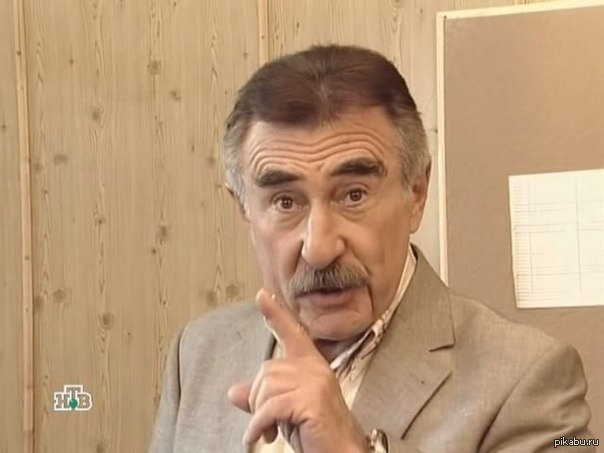

В общем, благо мы живем в прекрасное время существования чатГПТ и аналогов. Можно скормить вывод модели и чат ГПТ поможет построить ее архитектуру, чтобы лучше разобраться, заодно пояснит за нее)

##### **`class Conv(nn.Module)`**
- **Описание:** 
  Этот класс реализует базовый сверточный слой, который включает свертку (`Conv2d`), нормализацию батча (`BatchNorm2d`) и активационную функцию (`SiLU`).
- **Что делает:**
  1. Выполняет свертку с заданными параметрами (количество каналов, размер ядра, шаг, и т.д.).
  2. Применяет нормализацию батча для стабилизации обучения.
  3. Использует функцию активации `SiLU` для добавления нелинейности.
- **Зачем нужен:** 
  Это основной строительный блок сверточных нейронных сетей, который помогает извлекать признаки из входного изображения.

---

In [22]:
class Conv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, groups=1):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, groups=groups, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        self.act = nn.SiLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        out = self.act(x)
        return out

##### **`class Bottleneck(nn.Module)`**
- **Описание:**
  Этот класс реализует базовый бутстрепный блок, состоящий из двух последовательных сверточных операций.
- **Что делает:**
  1. Применяет последовательность операций `Conv-BN-SiLU` для уменьшения и восстановления размерности каналов.
  2. Поддерживает остаточную связь, позволяющую пропускать градиенты через блок, что упрощает обучение глубоких сетей.
- **Зачем нужен:**
  Блок используется для эффективного извлечения признаков и сокращения вычислительных затрат при сохранении информации.

---

In [28]:
class Bottleneck(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super().__init__()
        self.cv1 = Conv(in_channels, hidden_channels, kernel_size=3, stride=1, padding=1)
        self.cv2 = Conv(hidden_channels, in_channels, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        out = x + self.cv2(self.cv1(x))
        return out

##### **`class C3(nn.Module)`**
- **Описание:**
  Этот блок объединяет несколько слоев свертки и последовательность бутстрепных блоков (`Bottleneck`) в остаточной архитектуре.
- **Что делает:**
  1. Использует два последовательных сверточных слоя (`cv1` и `cv2`) для изменения размерности каналов.
  2. Включает модульный список с остаточными блоками, которые обучаются параллельно.
- **Зачем нужен:** 
  Уменьшает избыточность параметров и повышает эффективность модели, сохраняя высокую способность к генерализации.

---

In [24]:
class C3(nn.Module):
    def __init__(self, in_channels, out_channels, num_blocks):
        super().__init__()
        hidden_channels = out_channels // 2
        self.cv1 = Conv(in_channels, hidden_channels, kernel_size=1, stride=1, padding=0)
        self.cv2 = Conv(hidden_channels * 2, out_channels, kernel_size=1, stride=1, padding=0)
        self.m = nn.Sequential(*(Bottleneck(hidden_channels, hidden_channels // 2) for _ in range(num_blocks)))

    def forward(self, x):
            x1 = self.cv1(x)
            x2 = self.m(x1)

            out = torch.cat((x1, x2), dim=1)
            out = self.cv2(out)
            return out

##### **`class PSABlock(nn.Module)`**
- **Описание:**
  Этот класс реализует блок внимания с пространственной адаптацией (Position-Sensitive Attention).
- **Что делает:**
  1. Извлекает пространственные зависимости через механизм внимания.
  2. Применяет сверточные слои для уменьшения/увеличения размерности.
  3. Включает механизм позиционного кодирования через свертки с разделением на группы (`groups`).
- **Зачем нужен:**
  Улучшает способность модели концентрироваться на наиболее значимых областях изображения, что особенно важно для классификации сложных объектов.

---

In [25]:
class PSA(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.qkv = Conv(in_channels, in_channels * 2, kernel_size=1, stride=1, padding=0)
        self.proj = Conv(in_channels, in_channels, kernel_size=1, stride=1, padding=0)
        self.pe = Conv(in_channels, in_channels, kernel_size=3, stride=1, padding=0, groups=in_channels)
        self.ffn = nn.Sequential(
            Conv(in_channels, in_channels * 2, kernel_size=1, stride=1, padding=0),
            Conv(in_channels * 2, in_channels, kernel_size=1, stride=1, padding=0)
        ) 

    def forward(self, x):
        attn = self.proj(self.qkv(x) + self.pe(x))
        out = self.ffn(attn) + x
        return out

In [29]:
class MyYOLO11n(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            Conv(3, 16, 3, 2, 1),
            Conv(16, 32, 3, 2, 1),
            C3(32, 64, num_blocks=1),
            Conv(64, 64, 3, 2, 1),
            C3(64, 128, num_blocks=1),
            Conv(128, 128, 3, 2, 1),
            C3(128, 256, num_blocks=1),
            Conv(256, 256, 3, 2, 1),
            PSA(256),
            Conv(256, 1280, 1, 1, 0),
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(1280, num_classes)
        )

    def forward(self, x):
        return self.model(x)

Настало время проверить, что я там наковырял. насобирал.

Архитектура Yolo существенно сложнее, чем то, что я делал ранее. Но это, по идее новейшая архитектура. 

Отправная точка ясна, конечная(на данный момент) тоже ясна для освоения и изучения, так что в целом, я думаю, можно спокойно справиться и изучить данные архитектуры))

Выглядит, как будто бы похоже, но не совсем, надо поточнее сравнить с исходной.

Вероятно надо провести еще ресерч и поиск более детальной информации об архитектуре (код из репозитория на данном этапе моего развития не совсем понятен и только запутывает)

In [31]:
model = MyYOLO11n(80)
model

MyYOLO11n(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (m): Seq

In [32]:
# Посмотрим на все слои в более удобочитаемом формате
for layer in model.state_dict():
    print(layer)

model.0.conv.weight
model.0.bn.weight
model.0.bn.bias
model.0.bn.running_mean
model.0.bn.running_var
model.0.bn.num_batches_tracked
model.1.conv.weight
model.1.bn.weight
model.1.bn.bias
model.1.bn.running_mean
model.1.bn.running_var
model.1.bn.num_batches_tracked
model.2.cv1.conv.weight
model.2.cv1.bn.weight
model.2.cv1.bn.bias
model.2.cv1.bn.running_mean
model.2.cv1.bn.running_var
model.2.cv1.bn.num_batches_tracked
model.2.cv2.conv.weight
model.2.cv2.bn.weight
model.2.cv2.bn.bias
model.2.cv2.bn.running_mean
model.2.cv2.bn.running_var
model.2.cv2.bn.num_batches_tracked
model.2.m.0.cv1.conv.weight
model.2.m.0.cv1.bn.weight
model.2.m.0.cv1.bn.bias
model.2.m.0.cv1.bn.running_mean
model.2.m.0.cv1.bn.running_var
model.2.m.0.cv1.bn.num_batches_tracked
model.2.m.0.cv2.conv.weight
model.2.m.0.cv2.bn.weight
model.2.m.0.cv2.bn.bias
model.2.m.0.cv2.bn.running_mean
model.2.m.0.cv2.bn.running_var
model.2.m.0.cv2.bn.num_batches_tracked
model.3.conv.weight
model.3.bn.weight
model.3.bn.bias
model.3.bn

В общем то, несколько похожа, но не прям супер пупер, но как отправная точка для изучения архитектуры Yolo11 - пойдет.

В идеале необходимо будет доработать и полностью самому собрать модель. Данная задача не является приоритетной в рамках данного ноутбука, так что необходимо двигаться дальше.

#### Использование предобученной модели для задачи классификации.

##### Подготовка данных

Подготовка данных проводилась в соответствии с данным [туториалом с официального сайта](https://docs.ultralytics.com/ru/datasets/classify/#dataset-structure-for-yolo-classification-tasks)

По сути ничего сложного, просто теперь val станет тестом.

На сайте написано, что val опцинален, логично предположить, что модель автоматически разобьет трейновую часть так, как ей это необходимо.

In [2]:
# датасет в папке: afhq, поэтому зададим путь к ней
data_path = './data/afhq'

In [4]:
print('Структура данных')
print()
print('Папка afhq содержит:')
for _ in os.listdir(data_path):
    print(f'    - Папка {_} содержит:')
    for label in os.listdir(data_path + '/' + _):
        print(f'        - Папка {label} содержит: {len(os.listdir(data_path + '/' + _ + '/' + label))} файла/ов с изображениями')

Структура данных

Папка afhq содержит:
    - Папка test содержит:
        - Папка cat содержит: 500 файла/ов с изображениями
        - Папка dog содержит: 500 файла/ов с изображениями
        - Папка wild содержит: 500 файла/ов с изображениями
    - Папка train содержит:
        - Папка cat содержит: 5153 файла/ов с изображениями
        - Папка dog содержит: 4739 файла/ов с изображениями
        - Папка wild содержит: 4738 файла/ов с изображениями


In [5]:
##### Дообучение модели yolo11n-cls.pt

In [6]:
# загрузка модели
model = YOLO('yolo11n-cls.pt')

Вот это, конечно, удивительно, всего лишь 5.25М, на мой мало что повидавший мозг, такой размер предобученной модели произвел впечатление

In [7]:
# обучение модели
results = model.train(data=data_path, epochs=5, imgsz=512)

New https://pypi.org/project/ultralytics/8.3.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.65 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1070, 8111MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=./data/afhq, epochs=5, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 15.7MB/s]


AMP: checks passed ✅


train: Scanning /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/


train: New cache created: /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/data/afhq/train.cache


val: Scanning /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV


val: New cache created: /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/data/afhq/test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/runs/classify/train
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/5       1.3G      1.263         16        512:   1%|          | 11/915

        1/5       1.3G      1.228         16        512:   3%|▎         | 26/915
        1/5       1.3G      1.228         16        512:   3%|▎         | 27/915
100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 3.53MB/s]
        1/5       1.3G      0.264          6        512: 100%|██████████| 915/91
               classes   top1_acc   top5_acc: 100%|██████████| 47/47 [00:03<00:0

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


        2/5      1.31G    0.05287          6        512: 100%|██████████| 915/91
               classes   top1_acc   top5_acc: 100%|██████████| 47/47 [00:03<00:0

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


        3/5      1.31G    0.04161          6        512: 100%|██████████| 915/91
               classes   top1_acc   top5_acc: 100%|██████████| 47/47 [00:02<00:0

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


        4/5       1.3G    0.02935          6        512: 100%|██████████| 915/91
               classes   top1_acc   top5_acc: 100%|██████████| 47/47 [00:03<00:0

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


        5/5       1.3G    0.01689          6        512: 100%|██████████| 915/91
               classes   top1_acc   top5_acc: 100%|██████████| 47/47 [00:03<00:0

                   all      0.995          1



5 epochs completed in 0.159 hours.
Optimizer stripped from /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/runs/classify/train/weights/best.pt, 3.2MB

Validating /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/runs/classify/train/weights/best.pt...
Ultralytics 8.3.65 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1070, 8111MiB)
YOLO11n-cls summary (fused): 112 layers, 1,529,867 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/data/afhq/train... found 14630 images in 3 classes ✅ 
val: None...
test: /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/data/afhq/test... found 1500 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 47/47 [00:03<00:0


                   all      0.996          1
Speed: 0.4ms preprocess, 1.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/runs/classify/train


Очень круто конечно, создатели и разработчики ultralytics - красавчики. 

Кнопку нажал, модель полетела дообучаться, даже на моей скромной 1070 на 8Гб.

##### Тестовые предсказания

Пришло время попредсказывать на изображениях, которые модель гарантированно не видел, заодно познакмлю вас с моими подопытными)

Все изображения разные, разного формата. разных периодов моей жизни. Ведь в этом и суть, мы не будем упрощать модели жизнь, посмотрим насколько она хорошо с ними справится

In [44]:
test_1 = './test_pics/test_1.jpg'
test_2 = './test_pics/test_2.jpg'
test_3 = './test_pics/test_3.jpg'
test_4 = './test_pics/test_4.jpg'
test_5 = './test_pics/test_5.jpg'
test_6 = './test_pics/test_6.jpg'
test_7 = './test_pics/test_7.jpg'
test_8 = './test_pics/test_8.jpg'
test_9 = './test_pics/test_9.jpg'
test_10 = './test_pics/test_10.jpg'

###### Тест №1 - подопытный "КУЗЯ"

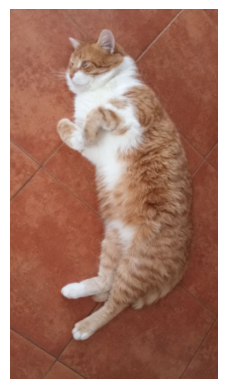

In [38]:
%matplotlib inline

img = (Image.open(test_1))

plt.imshow(img)
plt.axis('off')  # Убираем оси для чистоты изображения
plt.show()

In [45]:
result_1 = model(test_1)


image 1/1 /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/test_pics/test_1.jpg: 512x512 wild 0.53, cat 0.25, dog 0.22, 6.0ms
Speed: 37.5ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 512)


Тут моделька думает. что Кузя с 0,53 - дикое животное, 0.25, что котик и 0.22, что собака, интересные выводы)

В данном тесте, модель однозначно ошибется.

###### Тест №2 - подопытный "ЛАСКА"

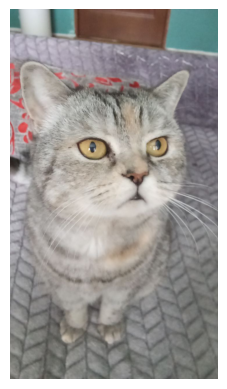

In [43]:
%matplotlib inline

img = (Image.open(test_2))

plt.imshow(img)
plt.axis('off')  # Убираем оси для чистоты изображения
plt.show()

In [41]:
result_2 = model(test_2)


image 1/1 /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/test_pics/test_2.jpg: 512x512 cat 1.00, wild 0.00, dog 0.00, 5.5ms
Speed: 28.3ms preprocess, 5.5ms inference, 0.1ms postprocess per image at shape (1, 3, 512, 512)


Во втором тесте модель на 100% уверена, что видит кошку и выигрывает за это автомобиль!

###### Тест №3 - подопытный "ВИНСЕНТ"

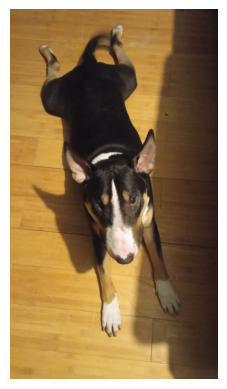

In [66]:
%matplotlib inline

img = (Image.open(test_3))

plt.imshow(img)
plt.axis('off')  # Убираем оси для чистоты изображения
plt.show()

In [67]:
result_3 = model(test_3)


image 1/1 /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/test_pics/test_3.jpg: 512x512 dog 0.86, wild 0.12, cat 0.02, 6.2ms
Speed: 33.1ms preprocess, 6.2ms inference, 0.1ms postprocess per image at shape (1, 3, 512, 512)


Хорошо, модель на 0,86 уверена. что видит собаку. Ставим ей лайк

###### Тест №4 - подопытный "ВИНСЕНТ"

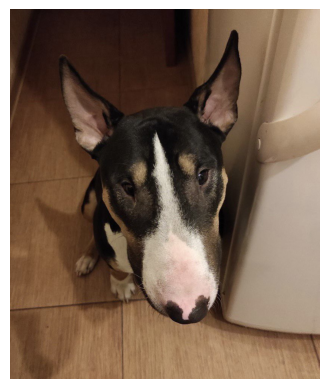

In [64]:
%matplotlib inline

img = (Image.open(test_4))

plt.imshow(img)
plt.axis('off')  # Убираем оси для чистоты изображения
plt.show()

In [68]:
result_4 = model(test_4)


image 1/1 /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/test_pics/test_4.jpg: 512x512 dog 0.87, wild 0.11, cat 0.01, 6.9ms
Speed: 25.7ms preprocess, 6.9ms inference, 0.1ms postprocess per image at shape (1, 3, 512, 512)


Здесь уверенности модели подросла на процентик и она ответила правильно)

###### Тест №5 - подопытный "ЛАСКА"

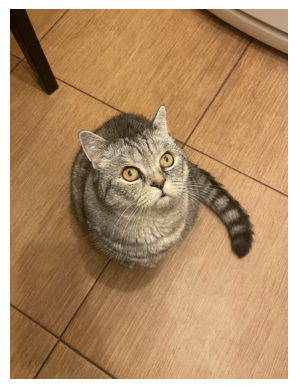

In [62]:
%matplotlib inline

img = (Image.open(test_5))

plt.imshow(img)
plt.axis('off')  # Убираем оси для чистоты изображения
plt.show()

In [69]:
result_5 = model(test_5)


image 1/1 /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/test_pics/test_5.jpg: 512x512 cat 0.58, wild 0.42, dog 0.00, 3.5ms
Speed: 29.4ms preprocess, 3.5ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 512)


Тут видно, что модель "борется", что не удивительно, мне кажется кошки встречаются чаще в дикой природе нежели, чем собаки)

Но тем не менее, "вероятность" того. что это кошка, выше.

Модель права.

###### Тест №6 - подопытный "ЛАСКА"

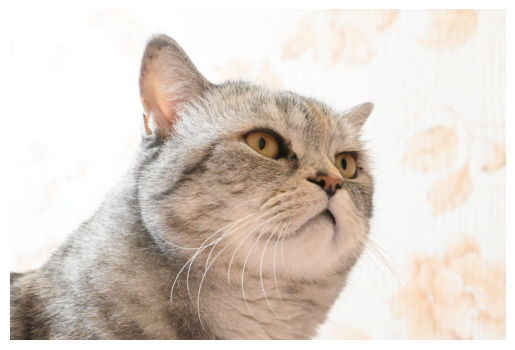

In [61]:
%matplotlib inline

img = (Image.open(test_6))

plt.imshow(img)
plt.axis('off')  # Убираем оси для чистоты изображения
plt.show()

In [70]:
result_6 = model(test_6)


image 1/1 /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/test_pics/test_6.jpg: 512x512 cat 1.00, wild 0.00, dog 0.00, 6.1ms
Speed: 59.0ms preprocess, 6.1ms inference, 0.1ms postprocess per image at shape (1, 3, 512, 512)


Здесь модель на все 100 уверена, что видит кошку)

А я вот вижу котозмею!)

###### Тест №7 - подопытный "ЛАСКА"

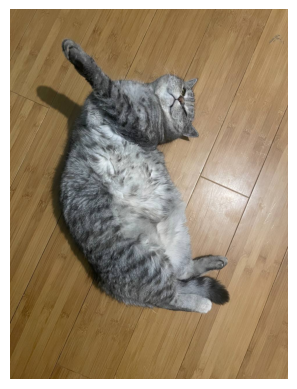

In [60]:
%matplotlib inline

img = (Image.open(test_7))

plt.imshow(img)
plt.axis('off')  # Убираем оси для чистоты изображения
plt.show()

In [71]:
result_7 = model(test_7)


image 1/1 /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/test_pics/test_7.jpg: 512x512 dog 0.81, wild 0.19, cat 0.01, 3.7ms
Speed: 30.5ms preprocess, 3.7ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 512)


А вот это интересно, модель ошибается и видит здесь собаку.

Хотя на самом деле здесь Илон Маск с инагурации Трампа)

2ой раза модель ошиблась.

###### Тест №8 - подопытный "МУФАСА"

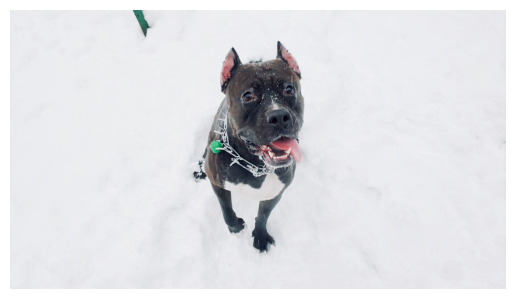

In [58]:
%matplotlib inline

img = (Image.open(test_8))

plt.imshow(img)
plt.axis('off')  # Убираем оси для чистоты изображения
plt.show()

In [72]:
result_8 = model(test_8)


image 1/1 /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/test_pics/test_8.jpg: 512x512 dog 1.00, wild 0.00, cat 0.00, 5.0ms
Speed: 21.8ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 512)


Собака, твердо и четко!

###### Тест №9 - подопытный "МУФАСА"

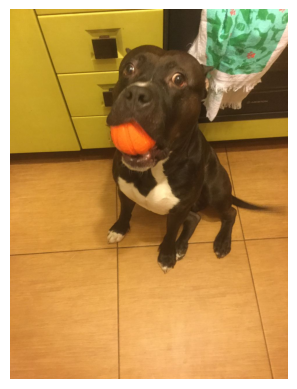

In [57]:
%matplotlib inline

img = (Image.open(test_9))

plt.imshow(img)
plt.axis('off')  # Убираем оси для чистоты изображения
plt.show()

In [73]:
result_9 = model(test_9)


image 1/1 /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/test_pics/test_9.jpg: 512x512 dog 1.00, wild 0.00, cat 0.00, 4.6ms
Speed: 21.7ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 512, 512)


Так же видит собаку)

###### Тест №10 - подопытный "МУФАСА"

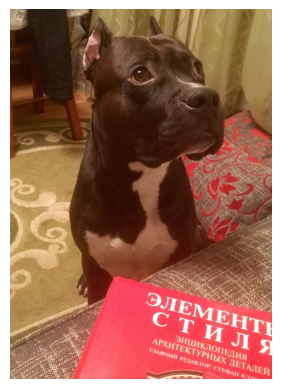

In [56]:
%matplotlib inline

img = (Image.open(test_10))

plt.imshow(img)
plt.axis('off')  # Убираем оси для чистоты изображения
plt.show()

In [76]:
result_10 = model(test_10)


image 1/1 /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/CV/01.Classification_Images/test_pics/test_10.jpg: 512x512 dog 0.78, cat 0.18, wild 0.03, 6.5ms
Speed: 18.9ms preprocess, 6.5ms inference, 0.1ms postprocess per image at shape (1, 3, 512, 512)


А вот тут модель начала сомневаться, но не ошиблась

Итого Точность составила 0,8)

### Интерпретация полученных результатов

Какие выводы можно сделать опираясь на проделанное в данном ноутбуке?

- Мне необходимо продолжать дальше разбираться в архитектуре, коде, документации.
- Необходимо так же посмотреть на настройки моделей, сравнить модели в разных задачах и сделать более масштабный проект.
- Рассмотреть иные задачи CV(Сегментация, детекция и т.д.)

Задачи CV мне очень интересны. Они необычные, они необходимые и смогут сделать этот мир лучше!

Инженеры, работающие в Ultralytics создали качественный продукт, который выдает прекрасные резульаты и способствует обучению новых людей, которые в будущем смогут улучшать мир!

Очень круто, что такая мощная сеть может обучаться даже на моей 1070 с 8Гб, без пыхчения и костылей различного характера. 